# ECON511 PS1 Compuation

In [1]:
using LinearAlgebra, Statistics, Optim, NLSolversBase, Random ,Distributions,Parameters,Plots, GLM, DataFrames


In [2]:
function probit_simulation(α,β,S,N;mean_x = 1.0, sd_x =2.0)
    α_s = zeros(S)
    β_s = zeros(S)
    wald_s = zeros(S)
    LM_s = zeros(S)
    LR_s = zeros(S)
    θ = [α,β]
    s = 1

    while s <= S
        x_rand = rand(Normal(mean_x),N)
        x = hcat(ones(N),x_rand)
        true_y = x * θ + randn(N)
        y = true_y.>=0
        ϵ_dist = Normal(0.0,1.0)
        unc_loglikeli(para) = -sum(y.*log.(cdf.(ϵ_dist,x*para))+((ones(N)-y).*log.(ones(N)-cdf.(ϵ_dist,x*para))))
        unc_func = TwiceDifferentiable(unc_loglikeli,ones(size(x)[2]);autodiff=:forward)
        unc_opt = optimize(unc_func,ones(size(x)[2]))
        unc_para = Optim.minimizer(unc_opt)
        α_s[s] = unc_para[1]
        β_s[s] = unc_para[2]
        numerical_score = jacobian!(unc_func,unc_para)
        numerical_hessian = hessian!(unc_func,unc_para)
        var_cov_matrix = inv(numerical_hessian)
        jacob_R = [0 1]

        con_loglikeli(con_para) = -sum(y.*log.(cdf.(ϵ_dist,ones(N,1)*con_para))+((ones(N)-y).*log.(ones(N)-cdf.(ϵ_dist,ones(N,1)*con_para))))
        con_opt = optimize(con_loglikeli,ones(1),BFGS())
        con_sol = Optim.minimizer(con_opt)
        con_para = vcat(con_sol,zeros(1))
        con_numerical_score = jacobian!(unc_func,con_para)
        con_numerical_hessian = hessian!(unc_func,con_para)
        β_hat = unc_para[2]
        wald = β_hat* inv(jacob_R*var_cov_matrix*transpose(jacob_R))*β_hat
        wald = wald[1]
        LM = transpose(con_numerical_score)*(inv(con_numerical_hessian))*con_numerical_score
        LR = 2*(unc_loglikeli(con_para)-unc_loglikeli(unc_para))

        wald_s[s] = wald
        LM_s[s] = LM
        LR_s[s] = LR
        s += 1
    end
    return α_s, β_s, wald_s, LM_s, LR_s
end

probit_simulation (generic function with 1 method)

## $(\alpha,\beta) = (1,1)$

In [14]:
h_α = stephist()
h_β = stephist()
h_wald = stephist()
h_LM = stephist()
h_LR = stephist()
for m in [500,1000,2000]
    stephist!(h_α,probit_simulation(1.0,1.0,300,m)[1],label = "N = $m",bins = 10)
    stephist!(h_β,probit_simulation(1.0,1.0,300,m)[2],label = "N = $m",bins = 10)
    stephist!(h_wald,probit_simulation(1.0,1.0,300,m)[3],label = "N = $m",bins = 10)
    stephist!(h_LM,probit_simulation(1.0,1.0,300,m)[4],label = "N = $m",bins = 10)
    stephist!(h_LR,probit_simulation(1.0,1.0,300,m)[5],label = "N = $m",bins = 10)
end

### $\alpha$

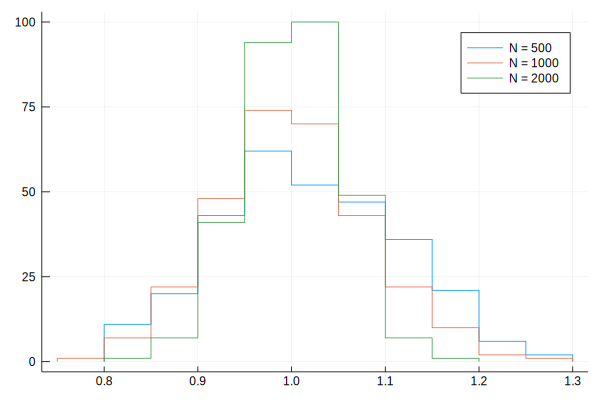

In [15]:
h_α

### $\beta$

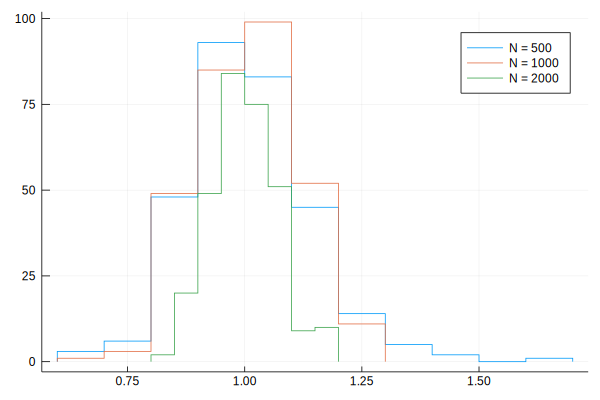

In [16]:
h_β

### Wald

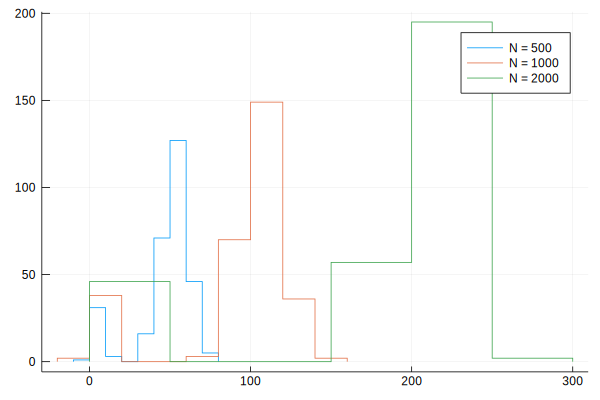

In [17]:
h_wald

### LM

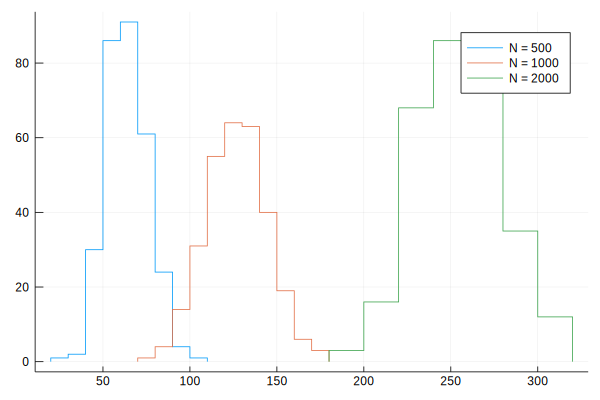

In [18]:
h_LM

### LR

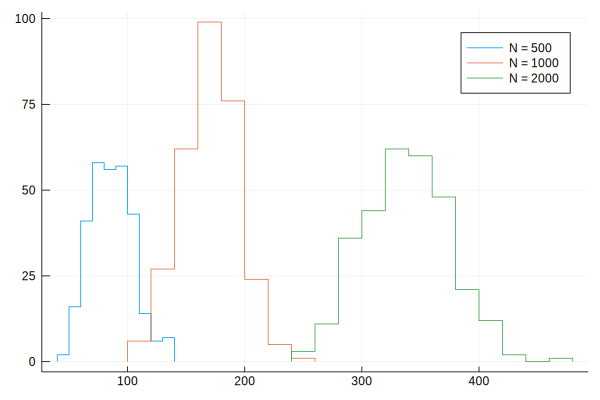

In [19]:
h_LR